# Lista 08 - Comparando Regressões

# Exercício 01:

Analise o desempenho do kNN e de uma Regressão Linear Regularizada para **pelo menos um** dos conjuntos de dados disponível na [seção de regressão linear múltipla](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html) da página do *Livro Understandable Statistics* de Charles Brase e Corrinne Brase. Para o conjunto de dados que escolheu, execute a regressão linear múltipla para explicar o fator $X1$ dos dados ([ver descrição de um dos conjuntos](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)) a partir dos outros fatores. 

Para a questão, faça as seguintes tarefas:

* Realize treino, validação e teste
* Compare as métricas no teste
* Diferente da lista anterior, reporte o erro quadrado médio no conjunto de teste.

In [1]:
# YOUR CODE HERE
# raise NotImplementedError()
# ML models
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# data manipulators
import numpy as np
import pandas as pd

# graphics
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# importanto os dados de filmes
df = pd.read_excel("mlr06.xls")
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X1,X2,X3,X4,X5,X6,X7
0,478,184,40,74,11,31,20
1,494,213,32,72,11,43,18
2,643,347,57,70,18,16,16
3,341,565,31,71,11,25,19
4,773,327,67,72,9,29,24


Antes de realizar uma regressão, analisaremos quais os parâmetros que possuem uma relação linear entre si. Desejamos explicar o fator X1, portanto, analisaremos as formas com as quais os demais atributos de relacionama com X1.

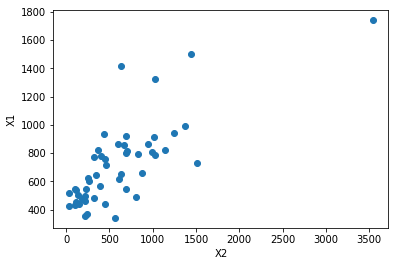

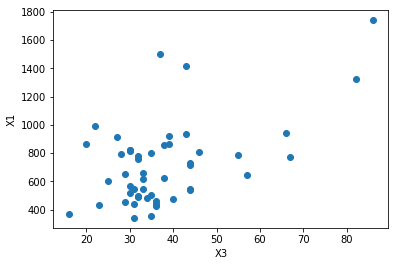

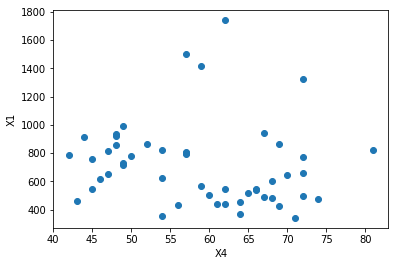

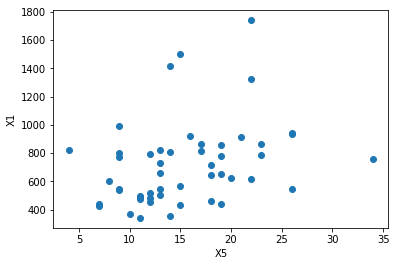

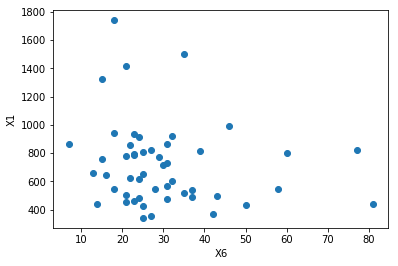

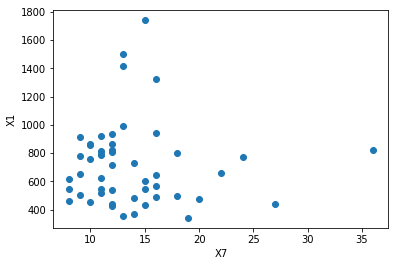

In [3]:
plt.scatter(df['X2'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X2')
plt.show()

plt.scatter(df['X3'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X3')
plt.show()

plt.scatter(df['X4'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X4')
plt.show()

plt.scatter(df['X5'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X5')
plt.show()

plt.scatter(df['X6'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X6')
plt.show()

plt.scatter(df['X7'], df['X1'])
plt.ylabel('X1')
plt.xlabel('X7')
plt.show()

É observável que X2 e X3 possuem uma relação mais linear com X1 do que X4, uma vez que os pontos no terceiro grafico estão muito dispersos, não sendo possível realizar um bom exame a cerca de um possível fator que defina uma relação entre tais atributos.

Encontraremos agora, um bom valor de K dentre os demais. Então para isso permutaremos possíveis valores de K analisando o menor erro médio quadratico como forma de computar a melhor escolha de K.

In [4]:
theta = ['X2', 'X3', 'X4', 'X5', 'X6', 'X7']
y = ['X1'] 
X_train, X_test, Y_train, Y_test =  train_test_split(df[theta], df[y] , test_size=0.33, random_state=42)

In [5]:
def mse_error(origin_y, train_y):
    return ((np.array(origin_y) - np.array(train_y))**2).mean()

sqe = np.inf
best_k = 0
for k in [1, 3, 5, 7, 9]:
# for k in [5]:
    x_train, x_valid, y_train, y_valid =  train_test_split(X_train, Y_train , test_size=0.2, random_state=42+k)
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh = neigh.fit(x_train, y_train.values.T[0])
    validation_result = neigh.predict(x_valid)
    sqe_train = mse_error(y_valid.values.T[0], validation_result)
    print("k =", k, " - sqe =", sqe_train)
    if(sqe_train < sqe):
        sqe = sqe_train
        best_k = k
    
print("best K value =", best_k)

k = 1  - sqe = 117005.0
k = 3  - sqe = 9399.634920634922
k = 5  - sqe = 16247.240000000005
k = 7  - sqe = 23663.959183673465
k = 9  - sqe = 112008.39858906527
best K value = 3


De acordo com a documentação de sklearn.linear_model.Ridge, pode-se inserir um parâmetro alpha que para valores altos de alpha há uma forte regularização dos dados. Portanto, para o próximo modelo, utilizaremos esse tipo de regressão linear.

In [6]:
# colocando um valor alto de alpha (50.0) já possíumos um alto grau de regularização dos dados
# entretanto não desejamos que a regularização seja demasiada, uma vez que pose atrapalhar
# a eficácia do modelo.
# Portanto, faremos com que os valores de alpha sejam permutados até encontrar um valor que
# reduza o erro quadrático médio

sqe = np.inf
best_alpha = 0.0
for alpha_ in range(0, 50):
    alpha = alpha_+1.0
    x_train, x_valid, y_train, y_valid =  train_test_split(X_train, Y_train , test_size=0.2, random_state=42+k)
    ridge = Ridge(alpha=alpha)
    ridge = ridge.fit(x_train, y_train.values.T[0])
    validation_result = ridge.predict(x_valid)
    sqe_train = mse_error(y_valid.values.T[0], validation_result)
    print("alpha =", alpha, " - sqe =", sqe_train)
    if(sqe_train < sqe):
        sqe = sqe_train
        best_alpha = alpha
    
print("best aplha value =", best_alpha)

alpha = 1.0  - sqe = 22019.303736841375
alpha = 2.0  - sqe = 21977.74979373287
alpha = 3.0  - sqe = 21936.91992632143
alpha = 4.0  - sqe = 21896.796928302258
alpha = 5.0  - sqe = 21857.364116989764
alpha = 6.0  - sqe = 21818.605313960437
alpha = 7.0  - sqe = 21780.504826533543
alpha = 8.0  - sqe = 21743.047430049202
alpha = 9.0  - sqe = 21706.218350903368
alpha = 10.0  - sqe = 21670.003250304297
alpha = 11.0  - sqe = 21634.38820871409
alpha = 12.0  - sqe = 21599.35971094312
alpha = 13.0  - sqe = 21564.904631865364
alpha = 14.0  - sqe = 21531.010222726083
alpha = 15.0  - sqe = 21497.664098012512
alpha = 16.0  - sqe = 21464.85422286208
alpha = 17.0  - sqe = 21432.568900982395
alpha = 18.0  - sqe = 21400.796763059636
alpha = 19.0  - sqe = 21369.526755632538
alpha = 20.0  - sqe = 21338.7481304105
alpha = 21.0  - sqe = 21308.4504340156
alpha = 22.0  - sqe = 21278.623498129462
alpha = 23.0  - sqe = 21249.25743002671
alpha = 24.0  - sqe = 21220.342603476944
alpha = 25.0  - sqe = 21191.8696499

De acordo com as regularizações realizadas, agora obteremos o valor do erro quadrático médio do teste. Assim, poderemos comparar e definir quais dos dois modelos foi o mais eficaz segunto tal métrica.

In [7]:
# obtendo resposta do KNN
neigh = KNeighborsRegressor(n_neighbors=best_k)
neigh = neigh.fit(X_train, Y_train.values.T[0])
knn_result = neigh.predict(X_test)
sqe_knn = mse_error(Y_test.values.T[0], knn_result)


ridge = Ridge(alpha=best_alpha)
ridge = ridge.fit(X_train, Y_train.values.T[0])
ridge_result = ridge.predict(X_test)
sqe_ridge = mse_error(Y_test.values.T[0], ridge_result)

print("KNN mean square error:", sqe_knn, '\n')

print("Ridge Linear Regression mean square error:", sqe_ridge)

KNN mean square error: 60980.19607843137 

Ridge Linear Regression mean square error: 76903.51149192385


Explique e discuta sobre os resultados encontrados no campo abaixo.

Inicialmente, para o modelo do KNN, tentou-se selecionar um K dentre no máximo 5 opções de números ímpares, de forma que não se obtivesse um overfitting causado por um valor de K muito elevado. A obtenção de K se deu de forma que comparou-se dentre os possíveis valores, o que minimizasse o erro quadrático médio, e então pôde-se produzir boas métricas para o modelo. Por fim, o modelo obtido através do KNN apresentou-se melhor que o modelo da regressão de Ridge, o que pode-se notar como um ponto positivo na utilização de tal método dde aprendizagem.

Para o regressor de Ridge, a escolha foi feita baseado no fato de que trata-se de um regressor regularizado pela métrica 'l2', o que poderia resultar em um bom modelo segundo o erro quadrático médio. Entretando, após 50 iterações não foi possível regularizar os dados tão bem quanto o KNN, para 5 iterações. Logo, é possível concluir a superioridade do modelo de regressão para o KNN em relação ao regressor de Ridge nesse estudo de caso.


